In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import matplotlib.pyplot as plt # plots
import cv2


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sem-photos-x300/TRPA1_IMQ_96h(x300).tif
/kaggle/input/sem-photos-x300/TRPA1_VAZ_24h(x300).tif
/kaggle/input/sem-photos-x300/TRPA1_IMQ_24h(x300).tif
/kaggle/input/sem-photos-x300/TRPV1_VAZ_24h(x300).tif
/kaggle/input/sem-photos-x300/BL6_VAZ_24h(x300).tif
/kaggle/input/sem-photos-x300/BL6_VAZ_96h(x300).tif
/kaggle/input/sem-photos-x300/BL6_IMQ_24h(x300).tif
/kaggle/input/sem-photos-x300/TRPV1_IMQ_96h_2(x300).tif
/kaggle/input/sem-photos-x300/TRPV1_IMQ_24h(x300).tif
/kaggle/input/sem-photos-x300/TRPV1_VAZ_96h(x300).tif
/kaggle/input/sem-photos-x300/TRPA1_VAZ_96h(x300).tif
/kaggle/input/sem-photos-x300/BL6_IMQ_96h(x300).tif


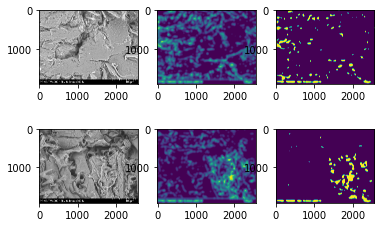

In [2]:
def Process(Img):

      for i in range(2):
            Img = cv2.GaussianBlur(Img, (3, 3), 0)

      edged = cv2.Canny(Img, 50, 100)
      edged = cv2.dilate(edged, None, iterations = 1)
      edged = cv2.erode(edged, None, iterations = 1)

      for i in range(10):
            edged = cv2.GaussianBlur(edged, (41, 41), 0)
      T, thresh = cv2.threshold(edged, 15, 255, cv2.THRESH_BINARY)
      return edged, thresh

img1 = cv2.imread('/kaggle/input/sem-photos-x300/TRPA1_VAZ_96h(x300).tif')
img2 = cv2.imread('/kaggle/input/sem-photos-x300/TRPA1_IMQ_96h(x300).tif')
edgeimg1, thresh1=Process(img1)
edgeimg2, thresh2=Process(img2)


plt.subplot(2, 3, 1)
plt.imshow(img1)
plt.subplot(2, 3, 2)
plt.imshow(edgeimg1)
plt.subplot(2, 3, 3)
plt.imshow(thresh1)

plt.subplot(2, 3, 4)
plt.imshow(img2)
plt.subplot(2, 3, 5)
plt.imshow(edgeimg2)
plt.subplot(2, 3, 6)
plt.imshow(thresh2)

plt.show()